# Some explorations of how Keras/TensorFlow can learn simple functions

In [1]:
%matplotlib inline

In [2]:
import matplotlib
from operator import xor

import numpy as np
from itertools import islice
import pandas
import seaborn
import random
import keras
from keras.layers import Dense, Activation, Dropout

seaborn.set()

Using TensorFlow backend.


In [3]:
matplotlib.rcParams['figure.figsize'] = (16.0, 3.0)

# Exclusive-OR

In [4]:
X=np.array([
    [random.choice([0,1]),random.choice([0,1])]
    for i in range(100)
])

Y = np.array([
    xor(*el) for el in X
])

YC=keras.utils.to_categorical(Y)

In [5]:
pandas.DataFrame({
    "X0":X[:,0],
    "X1":X[:,1],
    "Y":Y,
    "YC_0":YC[:,0],
    "YC_1":YC[:,1]
}).tail()

,X0,X1,Y,YC_0,YC_1
95,0,0,0,1.0,0.0
96,1,0,1,0.0,1.0
97,1,1,0,1.0,0.0
98,0,1,1,0.0,1.0
99,1,0,1,0.0,1.0


In [6]:
def test(model):
    
    history = model.fit(
        X,YC,
        epochs=1000,
        verbose=False
    )
    test_x=np.array([[0,0],[0,1],[1,0],[1,1]])
    print ("Probabilities:\n",model.predict(test_x))
    print ("Predicted classes:\n",model.predict_classes(test_x,verbose=0))

    pandas.DataFrame(history.history).plot(title="Learning history")

Probabilities:
 [[ 0.99001139  0.00998859]
 [ 0.01209559  0.98790437]
 [ 0.01234324  0.98765671]
 [ 0.98419225  0.01580779]]
Predicted classes:
 [0 1 1 0]


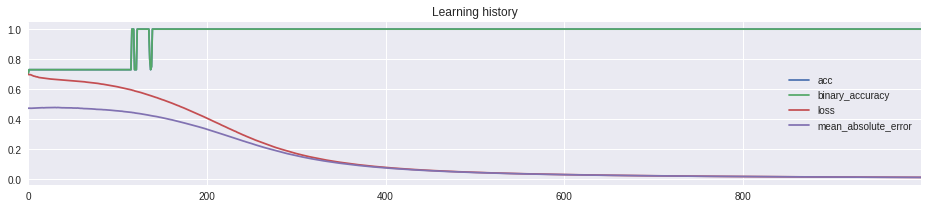

In [7]:
model=keras.models.Sequential([
        Dense(units=4, input_dim=2,activation='tanh'),
        Dense(units=2,  activation='tanh'),
        Dense(units=2,  activation='softmax')
    ])

model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['mae','accuracy','binary_accuracy'])
test(model)

## Much bigger network:

Probabilities:
 [[ 0.99875927  0.0012407 ]
 [ 0.0014077   0.99859232]
 [ 0.00131612  0.99868387]
 [ 0.99796754  0.00203243]]
Predicted classes:
 [0 1 1 0]


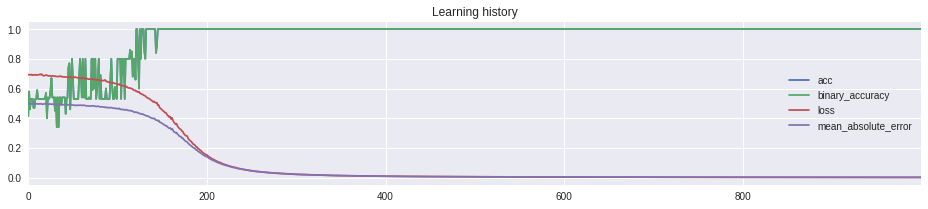

In [8]:
model=keras.models.Sequential([
        Dense(units=100, input_dim=2,activation='tanh'),
        Dense(units=100,  activation='tanh'),
        Dense(units=100,  activation='tanh'),
        Dense(units=100,  activation='tanh'),
        Dense(units=2,  activation='softmax')
    ])

model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['mae','accuracy','binary_accuracy'])
test(model)

## Dropout layers

Probabilities:
 [[ 0.99503279  0.0049672 ]
 [ 0.00369901  0.99630094]
 [ 0.00415051  0.99584949]
 [ 0.9958396   0.00416044]]
Predicted classes:
 [0 1 1 0]


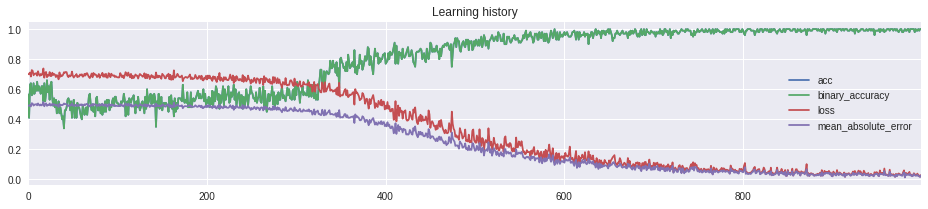

In [9]:
model=keras.models.Sequential([
        Dense(units=100, input_dim=2,activation='tanh'),
        Dropout(0.2),
        Dense(units=100,  activation='tanh'),
        Dropout(0.2),
        Dense(units=100,  activation='tanh'),
        Dropout(0.2),
        Dense(units=2,  activation='softmax')
    ])

model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['mae','accuracy','binary_accuracy'])
test(model)

# Learning the sine function

In [10]:
x=np.linspace(0,2*np.pi,200)

In [11]:
y=np.sin(x)

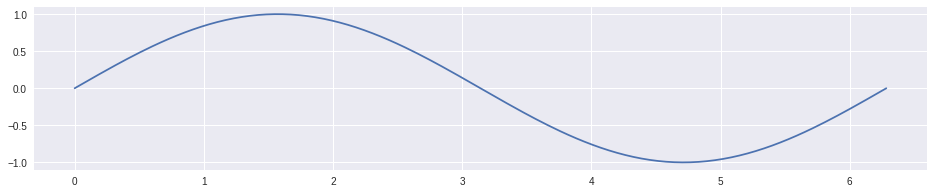

In [12]:
matplotlib.pyplot.plot(x,y)

In [13]:
def test2(model,x,y):
    
    history = model.fit(
        x,y,
        epochs=500,
        verbose=False
    )
    
    y_p = (model.predict(x))
    matplotlib.pyplot.title("Actual vs predicted")
    matplotlib.pyplot.plot(x,y,label='y')
    matplotlib.pyplot.plot(x,y_p,label='prediction')

    pandas.DataFrame(history.history).plot(title='Learning history')

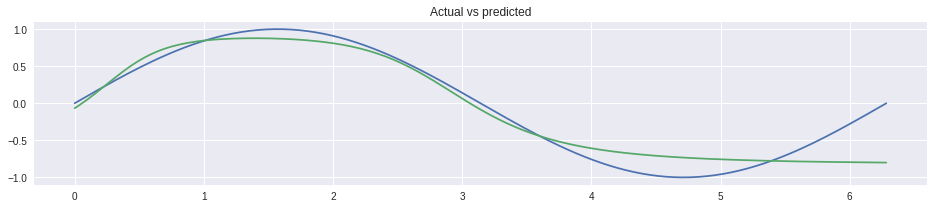

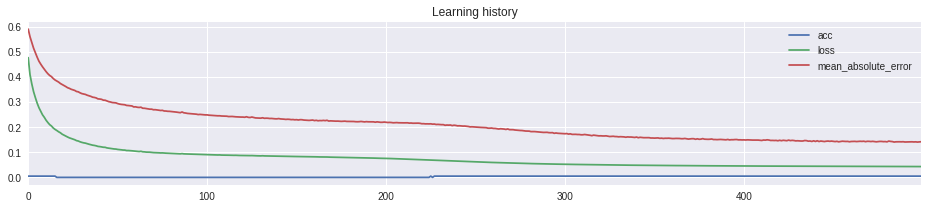

In [14]:
model=keras.models.Sequential([
        Dense(units=4, input_dim=1,activation='tanh'),
        Dense(units=2,  activation='tanh'),
        Dense(units=1,  activation='tanh')
    ])

model.compile(loss='mse', optimizer='sgd',metrics=['mae','accuracy'])
test2(model,x,y)

### Using a different optimizer

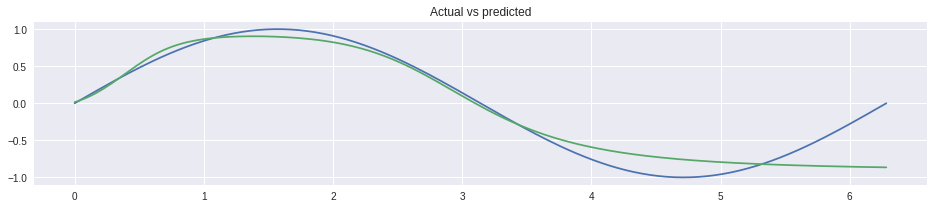

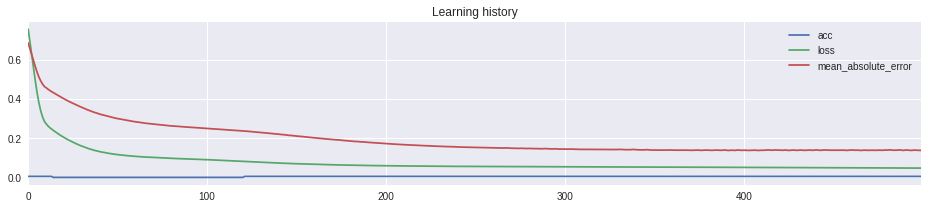

In [15]:
model=keras.models.Sequential([
        Dense(units=4, input_dim=1,activation='tanh'),
        Dense(units=2,  activation='tanh'),
        Dense(units=1,  activation='tanh')
    ])

model.compile(loss='mse', optimizer='adam',metrics=['mae','accuracy'])
test2(model,x,y)

## Bigger net

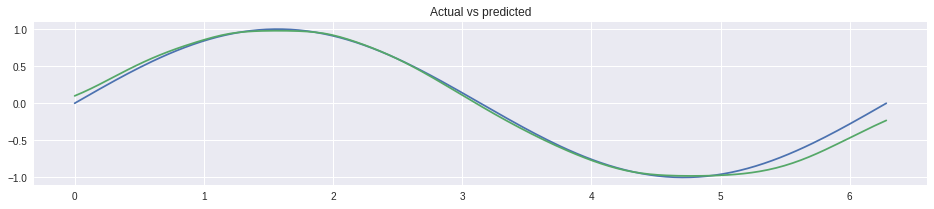

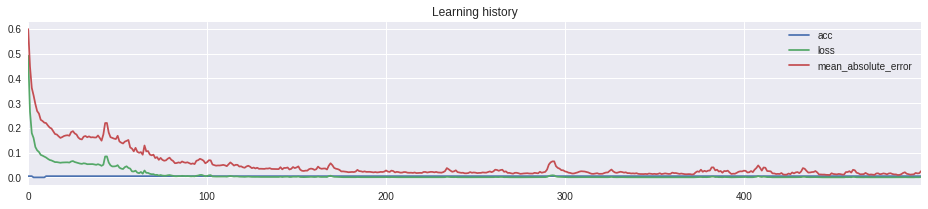

In [16]:
model=keras.models.Sequential([
        Dense(units=100, input_dim=1,activation='tanh'),
        Dense(units=100,  activation='tanh'),
        Dense(units=100,  activation='tanh'),
        Dense(units=100,  activation='tanh'),
        Dense(units=1,    activation='tanh')
    ])

model.compile(loss='mse', optimizer='adam',metrics=['mae','accuracy'])
test2(model,x,y)

## Dropout layers

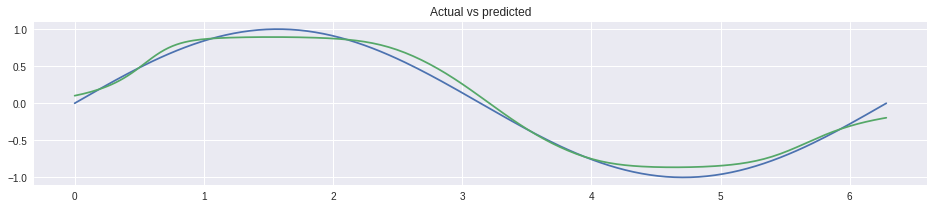

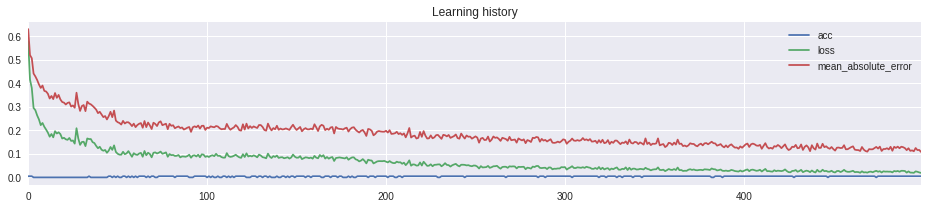

In [17]:
model=keras.models.Sequential([
        Dense(units=100, input_dim=1,activation='tanh',),
        Dropout(0.2),
        Dense(units=100,  activation='tanh'),
        Dropout(0.2),
        Dense(units=100,  activation='tanh'),
        Dropout(0.2),
        Dense(units=1,  activation='tanh')
    ])

model.compile(loss='mse', optimizer='adam',metrics=['mae','accuracy'])
test2(model,x,y)